<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import numpy as np

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 2: Generate Descriptive Statistics and Visualizations


In [45]:
#Dataframe 
boston_df. head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [46]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

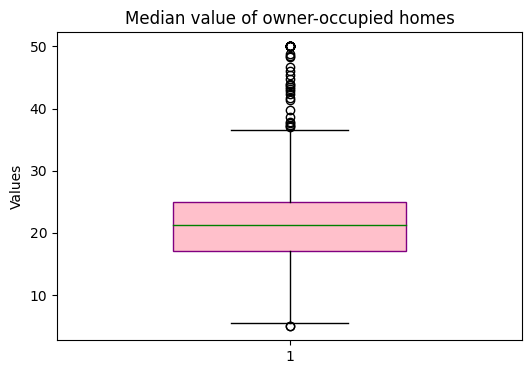

In [47]:
#Median value of owner-occupied homes
pyplot.figure(figsize=(6,4))
pyplot.boxplot(boston_df['MEDV'], widths= 0.5, patch_artist=True, boxprops=dict(facecolor='pink', color='purple'), medianprops=dict(color='green'))
pyplot.title("Median value of owner-occupied homes")
pyplot.ylabel("Values")
pyplot.show()

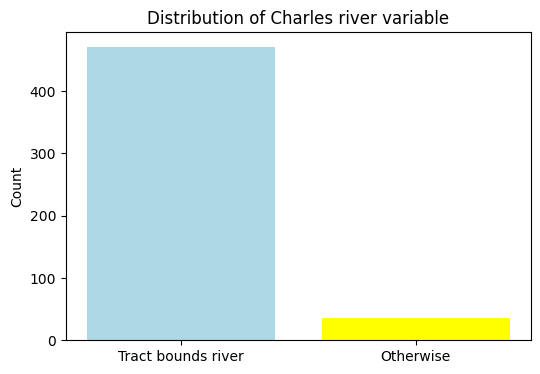

In [48]:
#Provide a  bar plot for the Charles river variable

variable_count = boston_df['CHAS'].value_counts().sort_index()
labels = ['Tract bounds river', 'Otherwise']
colors = ['lightblue', 'yellow']

pyplot.figure(figsize=(6,4))
pyplot.bar(x=variable_count.index, height=variable_count.values, color=colors)
pyplot.xticks(ticks=variable_count.index, labels=labels)
pyplot.ylabel("Count" )

pyplot.title("Distribution of Charles river variable")
pyplot.show()

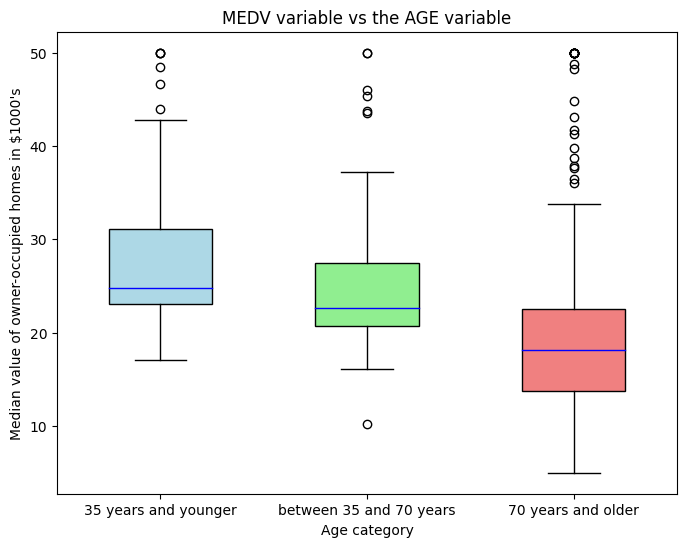

In [15]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
df = boston_df.loc[:, ['AGE', 'MEDV']]
df['AGE'] = np.where(df['AGE'] <= 35, '35 years and younger', np.where(df['AGE'] >= 70, '70 years and older', 'between 35 and 70 years'))
categories = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
data = [df.loc[df['AGE'] == category, 'MEDV'] for category in categories]

pyplot.figure(figsize=(8,6))
box = pyplot.boxplot(data, labels=categories, widths= 0.5, patch_artist=True, medianprops=dict(color='blue'))
pyplot.xlabel("Age category")
pyplot.ylabel("Median value of owner-occupied homes in $1000's")
pyplot.title("MEDV variable vs the AGE variable")

colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

pyplot.show()

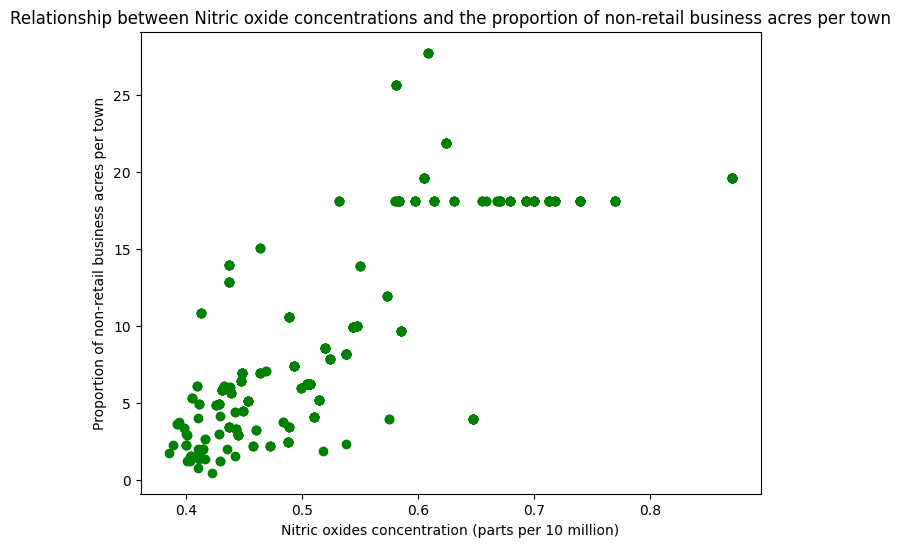

In [63]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#Relationship between NOX & INDUS
pyplot.figure(figsize=(8,6))
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'], color='green', marker='o')
pyplot.xlabel('Nitric oxides concentration (parts per 10 million)')
pyplot.ylabel('Proportion of non-retail business acres per town')
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.show()

#What can you say about the relationship?

#The scatter plot demonstrates a positive trend: as the industrial area increases, the Nitric oxide concentration also raise. Suggesting potential environmental impact of non-retail business acres.

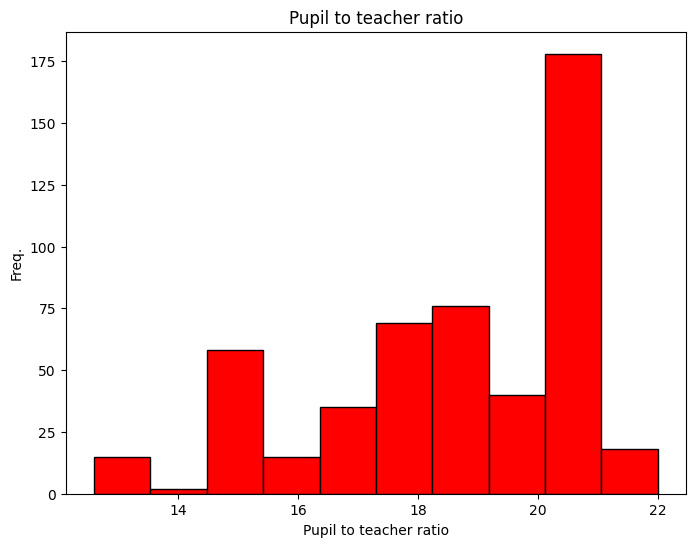

In [65]:
#Create a histogram for the pupil to teacher ratio variable
pyplot.figure(figsize=(8,6))
pyplot.hist(boston_df['PTRATIO'], bins=10, color='red', edgecolor='black')
pyplot.xlabel('Pupil to teacher ratio')
pyplot.ylabel('Freq.')
pyplot.title('Pupil to teacher ratio')
pyplot.show()

#### Task 3: Use the appropriate tests to answer the questions provided.

In [77]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#H0: There is no significant difference in MEDV for categories of CHAS
#H1: There is significant difference in MEDV for categories of CHAS

alpha = 0.05
c1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
c2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = stats.ttest_ind(c1, c2, equal_var=False)
print("t-statistic:", t_stat)
print("p-value;", p_value)
#Since, p_value < alpha we reject the null hypothesis. The difference is significant.

t-statistic: 3.113291312794837
p-value; 0.003567170098137517


In [80]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#H0: there is no significant difference between the means of all three groups
#H1: there is significant difference between the means of all three groups

category_a = boston_df[boston_df['AGE'] <= 35]['MEDV']
category_b = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]['MEDV']
category_c = boston_df[boston_df['AGE'] >= 70]['MEDV']

f_stat, p_value = stats.f_oneway(category_a, category_b, category_c)
print("F-statistic:", f_stat)
print("p-value;", p_value)

#Since, p_value < alpha we reject the null hypothesis. At least one group has a significantly different mean. 

F-statistic: 36.40764999196599
p-value; 1.7105011022702984e-15


In [82]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#Relationship between NOX & INDUS

from scipy.stats import pearsonr
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Coefficient:", corr)
print("p-value;", p_value)

#There is a strong positive correlation between NOX and INDUS. Suggesting environmental impact of non-retail business acres.

Coefficient: 0.7636514469209192
p-value; 7.913361061210442e-98


In [85]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#DIS & MEDV columns
#H0: There is no impact of an additional weighted distance on the median value of owner occupied homes
#H1: There is an impact from an additional weighted distance on the median value of owner occupied homes

import statsmodels.api as sm
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

print(model.summary())

#Because p_value < 0.05, we reject the H0.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        17:57:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0